# Fraud detection using machine learning


This project investigates Visa fraud problems try to identfiy fraudulent transactions using various machine learning algorithms and techniques.

### Step 1: Importing reusable files

In [1]:
import sys
# Add your folder path (note: use raw string r"..." to handle backslashes)
sys.path.append(r"C:\Users\Taha Sherif\OneDrive - New Giza University\education\Data analysis\EDA Reusable")
from EDA_template import *

In [2]:
sys.path.append(r"C:\Users\Taha Sherif\OneDrive - New Giza University\education\Data analysis\Classification Models Reusable")
from Classification_models_reusable import *

### Step 2: Access the csv file

In [3]:
df=pd.read_csv("creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Step 3: Data Exploration

-Explore the columns   
-Explore the data types     
-Check for missing values

In [4]:
overview(df)

Shape: (568630, 31)

 Columns: ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

 Data Types:
 id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [5]:
df["Amount"].head()

0    17982.10
1     6531.37
2     2513.54
3     5384.44
4    14278.97
Name: Amount, dtype: float64

In [6]:
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [7]:
missing_values(df)


 Missing Values Summary:
 Empty DataFrame
Columns: [Missing, Percent]
Index: []


### Step 4: Data Preprocessing

In [8]:
from scipy.stats import zscore

# Calculate z-scores and filter rows where any column has z > 3
z_scores = df.apply(zscore)
outliers = (abs(z_scores) > 3).sum()
print("Outliers per column:\n", outliers)


Outliers per column:
 id            0
V1            4
V2        12203
V3         1274
V4         1296
V5         6646
V6         5888
V7         7140
V8        17459
V9         4644
V10        3636
V11         467
V12         823
V13        1928
V14        1372
V15        2110
V16        2205
V17        6069
V18        4086
V19        3530
V20       10646
V21       10165
V22        9652
V23        9656
V24         513
V25        7758
V26        2871
V27       13337
V28       12590
Amount        0
Class         0
dtype: int64


In [9]:
df = df[(abs(z_scores) < 3).all(axis=1)]


In [10]:

z_scores = df.apply(zscore)
outliers = (abs(z_scores) > 3).sum()
print("Outliers per column:\n", outliers)

Outliers per column:
 id            0
V1            0
V2         5515
V3         1021
V4          372
V5         8644
V6         3165
V7         6165
V8        16197
V9         2017
V10         699
V11          38
V12          23
V13         551
V14         117
V15         348
V16         173
V17        2617
V18         580
V19         276
V20       10929
V21        7213
V22        2891
V23       13401
V24          93
V25        7009
V26         976
V27       15660
V28        9843
Amount        0
Class         0
dtype: int64


Reduced outliers per column

In [11]:
from sklearn.preprocessing import StandardScaler

# Columns to exclude
exclude_cols = ['Class', 'id']  # Add more if needed

# Get numeric columns only (excluding the target & others)
cols_to_scale = df.select_dtypes(include='number').columns.difference(exclude_cols)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


### Step 5: Data models


Cross-Validation (cv=5) Accuracy Scores: [0.9748457  1.         0.99985116 0.99995039 0.97093583]
Mean Accuracy: 0.9891
Standard Deviation: 0.0133

🔹 Logistic Regression
Accuracy: 0.9986
Precision: 0.9991
Recall: 0.9979
F1 Score: 0.9985

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53200
           1       1.00      1.00      1.00     47578

    accuracy                           1.00    100778
   macro avg       1.00      1.00      1.00    100778
weighted avg       1.00      1.00      1.00    100778



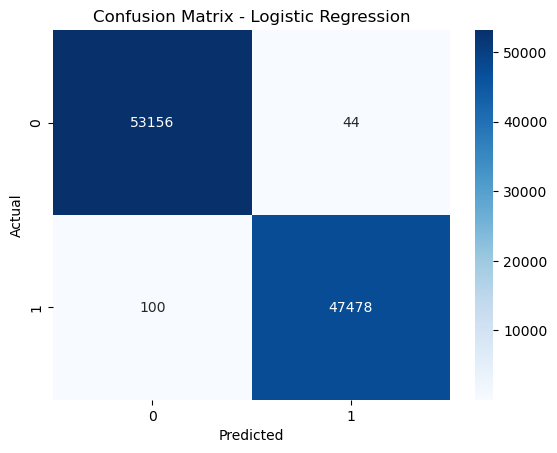

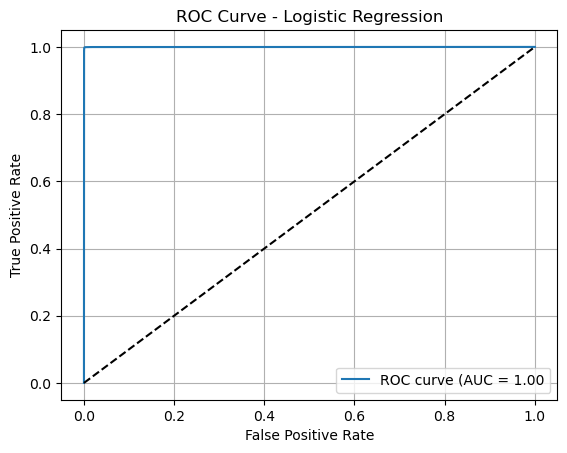

LogisticRegression(max_iter=1000)

In [12]:
# Example call
run_logistic_regression(df, "Class", cv=5)

C:\Users\Taha Sherif\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:33:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Taha Sherif\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:34:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Taha Sherif\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:34:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Taha Sherif\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:34:16] WARNING: C:\actions-runner\_work\xgbo


Cross-Validation (cv=5) Accuracy Scores: [0.99252813 0.99988093 0.99961301 0.99993054 0.99166476]
Mean Accuracy: 0.9967
Standard Deviation: 0.0038


C:\Users\Taha Sherif\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:34:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost
Accuracy: 0.9998
Precision: 0.9999
Recall: 0.9996
F1 Score: 0.9997

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53200
           1       1.00      1.00      1.00     47578

    accuracy                           1.00    100778
   macro avg       1.00      1.00      1.00    100778
weighted avg       1.00      1.00      1.00    100778



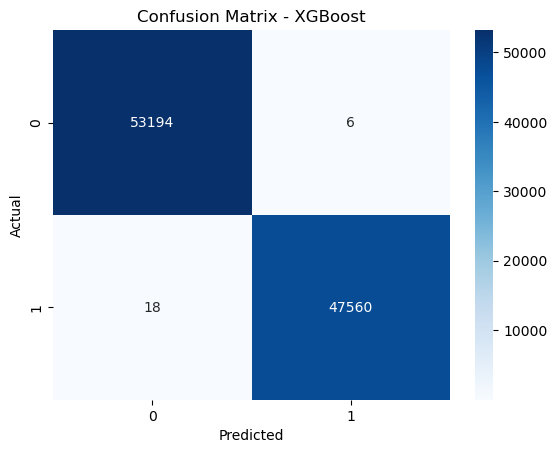

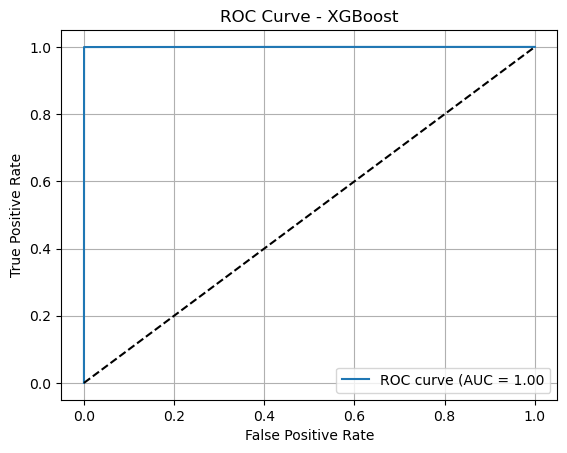

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [13]:
run_xgboost(df, "Class", cv=5)